### **Import libraries**

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

### **Data prep**

In [3]:
data_path = Path.home()/'notebooks/programming/data/watch_bot/'
csv_path = Path.home()/'notebooks/programming/projects/watch_bot/data_prep/file_attribs.csv'

In [4]:
df = pd.read_csv(csv_path)
df.head()

,image_size_x,image_size_y,name,dial_visibility,like,image_quality
0,960,960,nomos_1/nomos/_without_model/nomos_@_the_loupe...,1.0,1.0,1.0
1,960,960,nomos_1/nomos/_without_model/nomos_@_the_loupe...,1.0,0.0,1.0
2,960,960,nomos_1/nomos/_without_model/nomos_@_the_loupe...,0.0,0.0,0.0
3,720,960,nomos_1/nomos/_without_model/nomos_beta_11156_...,1.0,0.0,1.0
4,720,960,nomos_1/nomos/_without_model/nomos_beta_11156_...,1.0,0.0,1.0


In [5]:
df = df[['name', 'dial_visibility']]
df = df.astype({'dial_visibility': int})
df.head(), df.dtypes

(                                                name  dial_visibility
 0  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 1  nomos_1/nomos/_without_model/nomos_@_the_loupe...                1
 2  nomos_1/nomos/_without_model/nomos_@_the_loupe...                0
 3  nomos_1/nomos/_without_model/nomos_beta_11156_...                1
 4  nomos_1/nomos/_without_model/nomos_beta_11156_...                1,
 name               object
 dial_visibility     int64
 dtype: object)

#### **[vision.data Factory-methods](https://docs.fast.ai/vision.data.html#Factory-methods)**

In [14]:
data_fm = ImageDataBunch.from_df(data_path, df, size=128)
data_fm

ImageDataBunch;

Train: LabelList (9579 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,1,0,0
Path: /home/neronicolo/notebooks/programming/data/watch_bot;

Valid: LabelList (2394 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,1,1,1,0
Path: /home/neronicolo/notebooks/programming/data/watch_bot;

Test: None

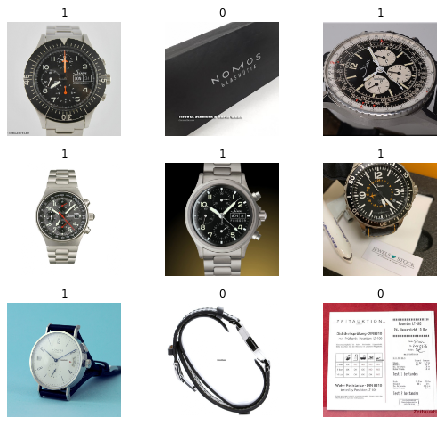

In [15]:
data_fm.show_batch(rows=3, figsize=(7,6))

#### **[data_block API](https://docs.fast.ai/data_block.html#The-data-block-API)**

In [13]:
data_db = (ImageList.from_df(df, data_path)
           .split_by_rand_pct()
           .label_from_df()
           .transform(size=128)
           .databunch())
data_db

ImageDataBunch;

Train: LabelList (9579 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,0,1,0
Path: /home/neronicolo/notebooks/programming/data/watch_bot;

Valid: LabelList (2394 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,0,1,0,1
Path: /home/neronicolo/notebooks/programming/data/watch_bot;

Test: None

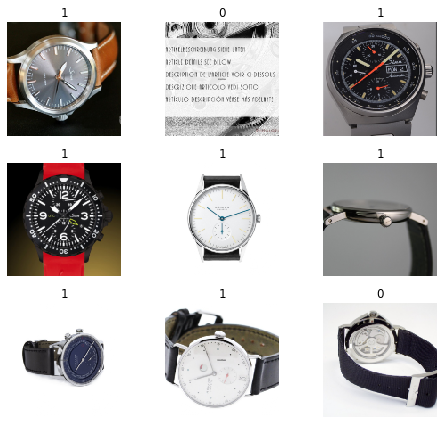

In [11]:
data_db.show_batch(rows=3, figsize=(7,6))